In [430]:
import numpy as np
import matplotlib.pyplot as plt

In [431]:
with open ("output.log") as f:
    data_lines = f.readlines()[1::2]
clean_data = [word.rstrip().lstrip().split(":")  for data_line in data_lines for word in data_line.split('\t') if word != '']
clean_data

[['iter', ' 306'],
 ['time per iter', ' 0.0124'],
 ['Epoch time', ' 3.78'],
 ['average_loss',
  ' [0.5021330261385286, 0.8803634480996565, 0.35584717405536187, 0.4269802914855401]'],
 ['average_reward',
  ' [-0.11964436411371676, -0.6280720441218722, -0.04386617128938781, -0.10102018231677176]'],
 ['iter', ' 92'],
 ['time per iter', ' 0.0069'],
 ['Epoch time', ' 0.64'],
 ['average_loss', ' [0.38968566, 0.45272142, 0.24869709, 0.3114466]'],
 ['average_reward',
  ' [-0.04310864629652089, -0.19021391468856308, -0.25920507147046057, 0.34695046514627836]'],
 ['iter', ' 155'],
 ['time per iter', ' 0.0053'],
 ['Epoch time', ' 0.82'],
 ['average_loss', ' [0.4233804, 0.3606982, 0.2623247, 0.32638413]'],
 ['average_reward',
  ' [-0.06527820375343409, 0.044679557423486664, 0.3495676302421315, 0.48366706193601783]'],
 ['iter', ' 50'],
 ['time per iter', ' 0.0087'],
 ['Epoch time', ' 0.43'],
 ['average_loss', ' [0.50866, 0.45997944, 0.37246925, 0.3792521]'],
 ['average_reward',
  ' [0.3566527447009

In [432]:

loss_data_dict = {key:[] for key in dict(clean_data).keys()}
loss_data_dict

{'iter': [],
 'time per iter': [],
 'Epoch time': [],
 'average_loss': [],
 'average_reward': []}

In [433]:
for i in range(0,len(clean_data),len(loss_data_dict)):
    for j in range(len(loss_data_dict)):
        k = clean_data[i+j][0]
        v = clean_data[i+j][1]
        v = v.replace('nan', 'np.nan')

        eval_v = eval(v)
            
        loss_data_dict[k].append(eval_v)

robot_count = len(loss_data_dict['average_loss'][0])
epochs_range = len(loss_data_dict['iter'])
loss_data_dict['average_loss'] = np.array(loss_data_dict['average_loss'])
loss_data_dict['average_reward'] = np.array(loss_data_dict['average_reward'])

In [434]:
loss_data_dict['average_loss'].shape

(149, 4)

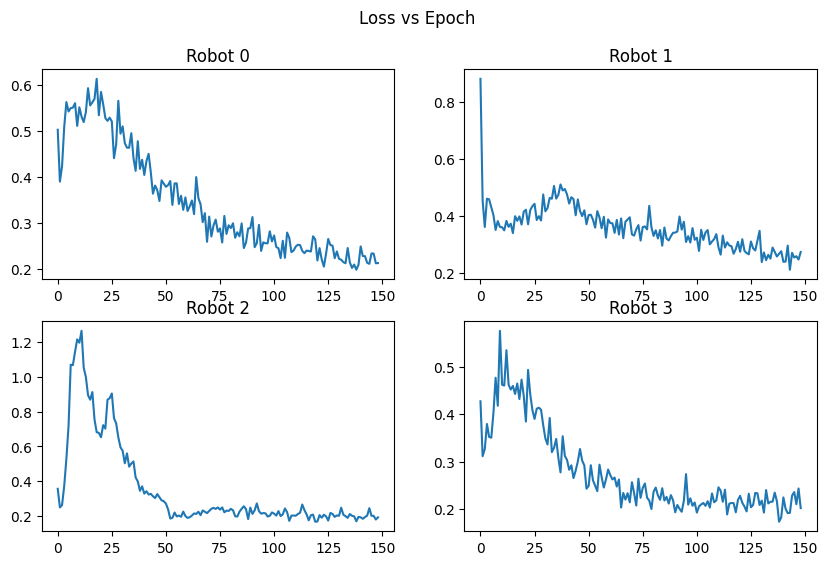

In [435]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,6))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['average_loss'][:,i])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Loss vs Epoch')
plt.savefig("4_robot_loss.png")
plt.show()


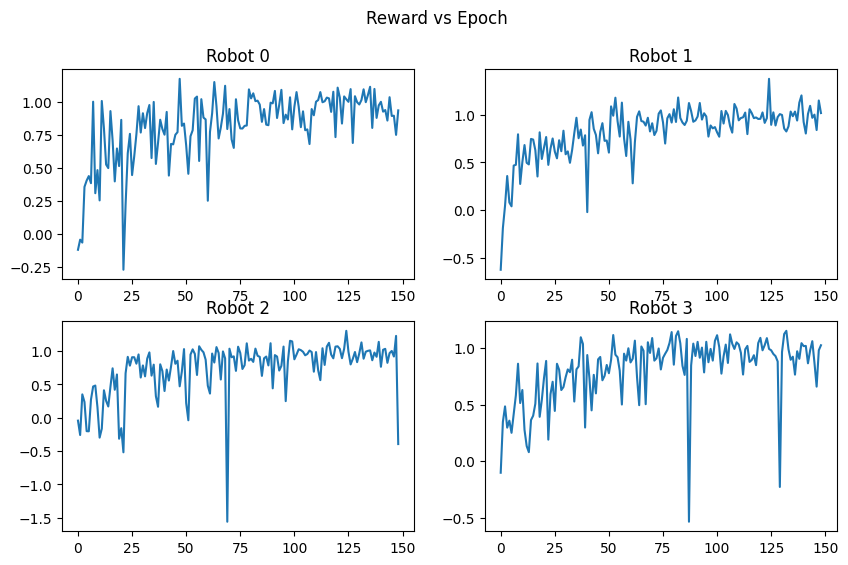

In [436]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,6))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['average_reward'][:,i])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Reward vs Epoch')
plt.savefig("4_robot_reward.png")
plt.show()

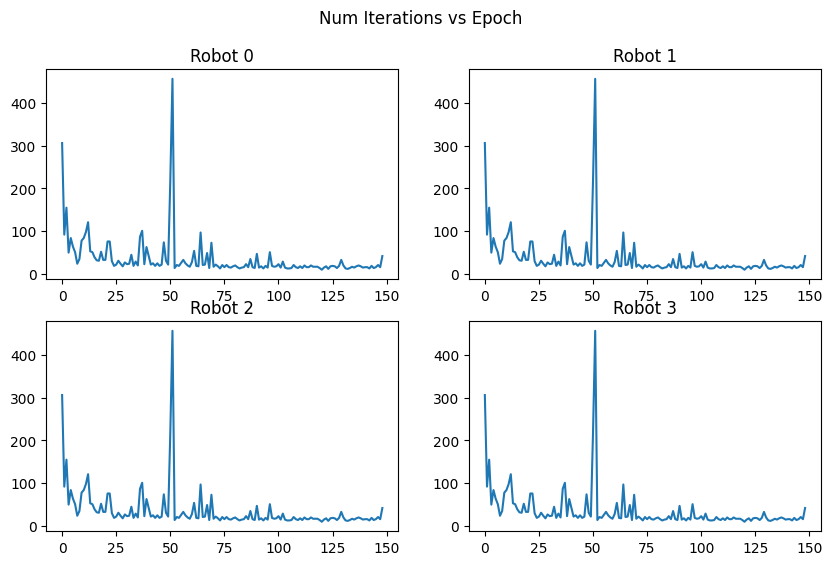

In [437]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,6))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['iter'][:])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Num Iterations vs Epoch')
plt.savefig("4_robot_iter.png")
plt.show()

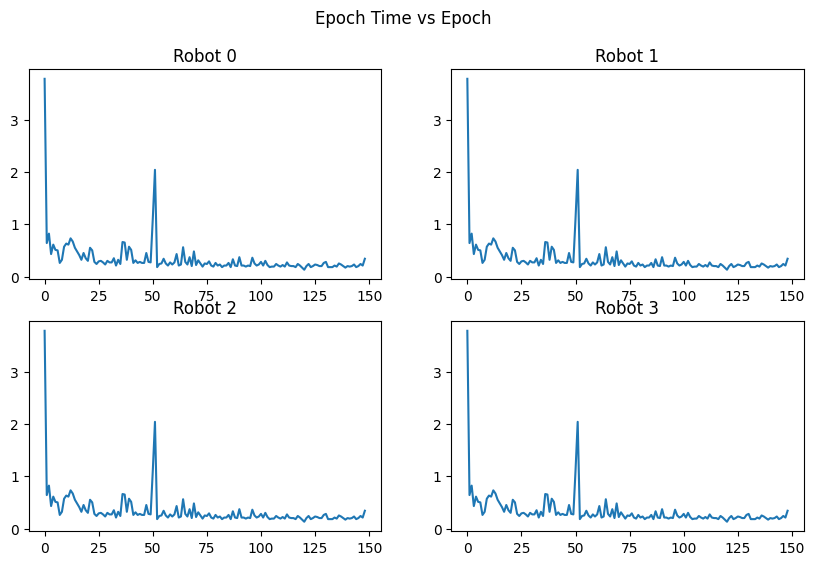

In [438]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(10,6))
axs = axs.flatten()
for i in range(robot_count): # for every robot

    axs[i].plot(range(epochs_range)[:],loss_data_dict['Epoch time'][:])
    axs[i].set_title(f"Robot {i}")
fig.suptitle('Epoch Time vs Epoch')
plt.savefig("4_robot_time.png")
plt.show()